In [1]:
from IsingClass import Ising
import matplotlib.pyplot as plt
import numpy as np
from acf import calculate_tau
from ising import exact_energy

In [2]:
J = 1
h = 0
size = 1_000
n_sweeps = 100_000
n_betas = 6
params = {'beta': np.linspace(0.5, 3, n_betas), 'estimate': np.empty((n_betas)), 'exact' : np.empty(n_betas), 'tau' : np.empty(n_betas), 'energies': np.empty((n_betas, n_sweeps)), 'magnetizations': np.empty((n_betas, n_sweeps))}

In [3]:
for i, beta in enumerate(params['beta']):
    ising = Ising(size, n_sweeps, beta, J, h)
    ising.monte_carlo()
    params['energies'][i], params['magnetizations'][i]= ising.energies, ising.magnetizations
    params['estimate'][i] = params['energies'][i][-1]
    params['exact'][i] = exact_energy(beta, J, N= size)

Monte Carlo finished
Monte Carlo finished
Monte Carlo finished
Monte Carlo finished
Monte Carlo finished
Monte Carlo finished


In [4]:
SE = (params['estimate'] -  params['exact']).std()/np.sqrt(n_betas)

In [5]:
np.abs(SE*100/params['estimate'].mean())

9152.323578189302

In [6]:
for i, beta in enumerate(params['beta']):
    params['tau'][i] = calculate_tau(params['magnetizations'][i])
    print(f'beta = {beta:.2f}, tau = {params["tau"][i]:.2f}')
    

beta = 0.50, tau = 2.65
beta = 1.00, tau = 16.79
beta = 1.50, tau = 100.41
beta = 2.00, tau = 527.68
beta = 2.50, tau = 923.78
beta = 3.00, tau = 977.09


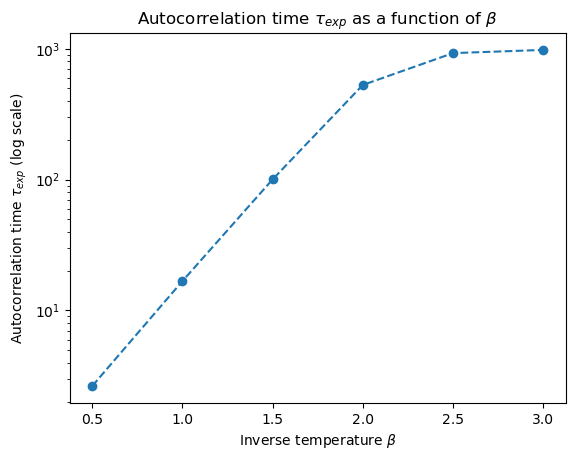

In [7]:
plt.plot(params['beta'], params['tau'], 'o--')
plt.yscale('log')
plt.xlabel(r'Inverse temperature $\beta$')
plt.ylabel(r'Autocorrelation time $\tau_{exp}$ (log scale)')
plt.title(r'Autocorrelation time $\tau_{exp}$ as a function of $\beta$')
plt.show()